1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [1]:
# Importando Librerias de regresion logistic
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as mplot
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
conjuntoDatos = pd.read_csv('./TitanicDataset.csv')
conjuntoDatos.head(297)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
292,293,0,2,"Levy, Mr. Rene Jacques",male,36.0,0,0,SC/Paris 2163,12.8750,D,C
293,294,0,3,"Haas, Miss. Aloisia",female,24.0,0,0,349236,8.8500,NaN,S
294,295,0,3,"Mineff, Mr. Ivan",male,24.0,0,0,349233,7.8958,NaN,S
295,296,0,1,"Lewy, Mr. Ervin G",male,NaN,0,0,PC 17612,27.7208,NaN,C


Text(0.5, 1.0, 'Identificacion de datos atipicos')

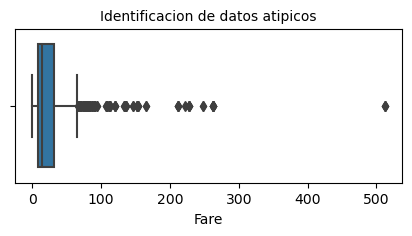

In [2]:
mplot.figure(figsize = (5,2))
sns.boxplot(x = conjuntoDatos["Fare"])
mplot.title("Identificacion de datos atipicos", fontsize = 10)

Text(0.5, 1.0, 'Identificacion de datos atipicos')

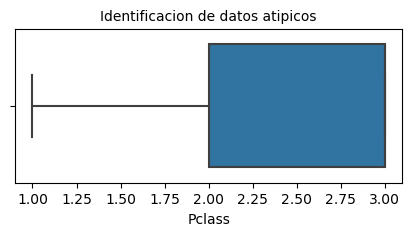

In [3]:
mplot.figure(figsize = (5,2))
sns.boxplot(x = conjuntoDatos["Pclass"])
mplot.title("Identificacion de datos atipicos", fontsize = 10)

Text(0.5, 1.0, 'Identificacion de datos atipicos')

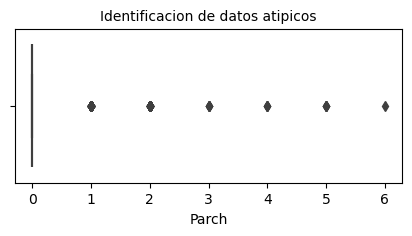

In [4]:
mplot.figure(figsize = (5,2))
sns.boxplot(x = conjuntoDatos["Parch"])
mplot.title("Identificacion de datos atipicos", fontsize = 10)

Graficamos las variables predictoras de manera que podamos saber si existen datos atipicos o erroneos

In [5]:
print("---------------------------------------------------------")
print("Cantidad de registros null en la columna Age:", conjuntoDatos['Age'].isin([0]).sum())
print("Cantidad de registros 0 en la columna Survived:", conjuntoDatos['Survived'].isin([0]).sum())
print("Cantidad de registros 0 en la columna Fare:", conjuntoDatos['Fare'].isin([0]).sum())
print("Cantidad de registros 0 en la columna PassengerId:", conjuntoDatos['PassengerId'].isin([0]).sum())
print("Cantidad de registros 0 en la columna Pclass:", conjuntoDatos['Pclass'].isin([0]).sum())
print("Cantidad de registros 0 en la columna SibSp:", conjuntoDatos['SibSp'].isin([0]).sum())
print("----------------------------------------------------------")

---------------------------------------------------------
Cantidad de registros null en la columna Age: 0
Cantidad de registros 0 en la columna Survived: 549
Cantidad de registros 0 en la columna Fare: 15
Cantidad de registros 0 en la columna PassengerId: 0
Cantidad de registros 0 en la columna Pclass: 0
Cantidad de registros 0 en la columna SibSp: 608
----------------------------------------------------------


Imprimimos la suma de las columnas con datos 0 y identificamos si esos valores son relevantes para el analisis de regresión logistica.

3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

In [6]:
conjuntoDatos["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

Contamos e imprimimos la cantidad de valores 0 como 1  en la columna survived columna objetivo del analisis.

Text(0.5, 1.0, 'Identificacion de datos atipicos')

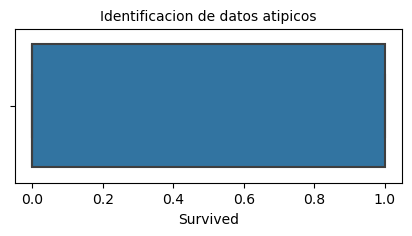

In [7]:
mplot.figure(figsize = (5,2))
sns.boxplot(x = conjuntoDatos["Survived"])
mplot.title("Identificacion de datos atipicos", fontsize = 10)

Graficamos la variable Objetivo y no encontramos datos atpicos.

Text(0.5, 1.0, 'Identificacion de datos atipicos')

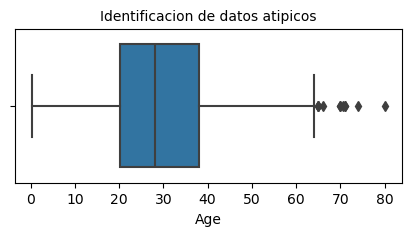

In [8]:
mplot.figure(figsize = (5,2))
sns.boxplot(x = conjuntoDatos["Age"])
mplot.title("Identificacion de datos atipicos", fontsize = 10)

In [11]:
#Datos atipicos en presion arterial.
minedad = 10
maxedad = 90
datosAtipicos = ((conjuntoDatos['Age'] < minedad)|
                 (conjuntoDatos['Age'] > maxedad)).sum()
print("Cantidad de datos atipicos en Age es: {}".format(datosAtipicos))


Cantidad de datos atipicos en Age es: 62


In [15]:
minfare=2
maxfare=50
conjuntoDatos = conjuntoDatos[(conjuntoDatos['Fare']< minfare) & 
                             (conjuntoDatos['Fare']> maxfare)]
print("Cantidad de datos atipicos en Fare es: {}".format(datosAtipicos))

Cantidad de datos atipicos en Fare es: 62


In [16]:
conjuntoDatos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  0 non-null      int64  
 1   Survived     0 non-null      int64  
 2   Pclass       0 non-null      int64  
 3   Name         0 non-null      object 
 4   Sex          0 non-null      object 
 5   Age          0 non-null      float64
 6   SibSp        0 non-null      int64  
 7   Parch        0 non-null      int64  
 8   Ticket       0 non-null      object 
 9   Fare         0 non-null      float64
 10  Cabin        0 non-null      object 
 11  Embarked     0 non-null      object 
dtypes: float64(2), int64(5), object(5)
memory usage: 0.0+ bytes


4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Paso 1: Cargar los datos (ajusta la ruta y el nombre del archivo según tu situación)
# Supongamos que los datos están en un archivo CSV llamado 'datos.csv'
# conjuntoDatos = pd.read_csv('ruta/al/archivo.csv')

# Para efectos de este ejemplo, crearé un DataFrame de ejemplo:
data = {
    'PassengerId': [1, 2, 3, 4, 5],
    'Age': [22, 38, 26, 35, 28],
    'OtherFeature': [7.25, 71.83, 7.92, 53.10, 8.05]
}
conjuntoDatos = pd.DataFrame(data)

# Verificar el contenido del DataFrame cargado
print("Contenido de conjuntoDatos:")
print(conjuntoDatos.head())
print("Forma de conjuntoDatos:", conjuntoDatos.shape)
print("Columnas de conjuntoDatos:", conjuntoDatos.columns)
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

# Datos de ejemplo
data = {
    'PassengerId': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [22, 38, 26, 35, 28, 60, 40, 50, 48, 20],
    'Fare': [7.25, 71.83, 7.92, 53.10, 8.05, 20.00, 15.00, 25.00, 30.00, 10.00],
    'Survived': [0, 1, 1, 1, 0, 0, 1, 0, 1, 0]
}
conjuntoDatos = pd.DataFrame(data)

# Definir características y etiquetas
ejeX = conjuntoDatos.drop(['Survived', 'Age'], axis=1)
ejeY = conjuntoDatos['Survived']

# Dividir los datos en conjuntos de entrenamiento y prueba
ejeX_train, ejeX_test, ejeY_train, ejeY_test = train_test_split(ejeX, ejeY, test_size=0.25, random_state=0)

# Entrenar el modelo
modelo = RandomForestClassifier()
modelo.fit(ejeX_train, ejeY_train)

# Hacer predicciones
prediccion = modelo.predict(ejeX_test)

# Verificar etiquetas únicas
print("Etiquetas únicas en ejeY_test:", set(ejeY_test))
print("Etiquetas únicas en prediccion:", set(prediccion))

# Generar el reporte de clasificación
print(classification_report(ejeY_test, prediccion, zero_division=0))



Contenido de conjuntoDatos:
   PassengerId  Age  OtherFeature
0            1   22          7.25
1            2   38         71.83
2            3   26          7.92
3            4   35         53.10
4            5   28          8.05
Forma de conjuntoDatos: (5, 3)
Columnas de conjuntoDatos: Index(['PassengerId', 'Age', 'OtherFeature'], dtype='object')
Etiquetas únicas en ejeY_test: {0, 1}
Etiquetas únicas en prediccion: {0}
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       0.00      0.00      0.00         2

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3



In [60]:
print(ejeY_train)

9    0
1    1
6    1
7    0
3    1
0    0
5    0
Name: Survived, dtype: int64


5. Entrenar el modelo configurando los diferentes hiperparámetros.

In [61]:
from sklearn.linear_model import LogisticRegression
regresion_logistica = LogisticRegression(solver = "liblinear")
regresion_logistica.fit(ejeX_train, ejeY_train)
prediccion = regresion_logistica.predict(ejeX_test)

In [62]:
print(ejeY_test)

2    1
8    1
4    0
Name: Survived, dtype: int64


In [63]:
print(prediccion)

[0 0 0]


6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

# Datos de ejemplo
data = {
    'PassengerId': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [22, 38, 26, 35, 28, 60, 40, 50, 48, 20],
    'Fare': [7.25, 71.83, 7.92, 53.10, 8.05, 20.00, 15.00, 25.00, 30.00, 10.00],
    'Survived': [0, 1, 1, 1, 0, 0, 1, 0, 1, 0]
}
conjuntoDatos = pd.DataFrame(data)

# Definir características y etiquetas
ejeX = conjuntoDatos.drop(['Survived', 'Age'], axis=1)
ejeY = conjuntoDatos['Survived']

# Dividir los datos en conjuntos de entrenamiento y prueba
ejeX_train, ejeX_test, ejeY_train, ejeY_test = train_test_split(ejeX, ejeY, test_size=0.25, random_state=0)

# Entrenar el modelo
modelo = RandomForestClassifier()
modelo.fit(ejeX_train, ejeY_train)

# Hacer predicciones
prediccion = modelo.predict(ejeX_test)

# Verificar etiquetas únicas
print("Etiquetas únicas en ejeY_test:", set(ejeY_test))
print("Etiquetas únicas en prediccion:", set(prediccion))

# Generar el reporte de clasificación
print(classification_report(ejeY_test, prediccion, zero_division=0))


Etiquetas únicas en ejeY_test: {0, 1}
Etiquetas únicas en prediccion: {0}
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       0.00      0.00      0.00         2

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3



7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

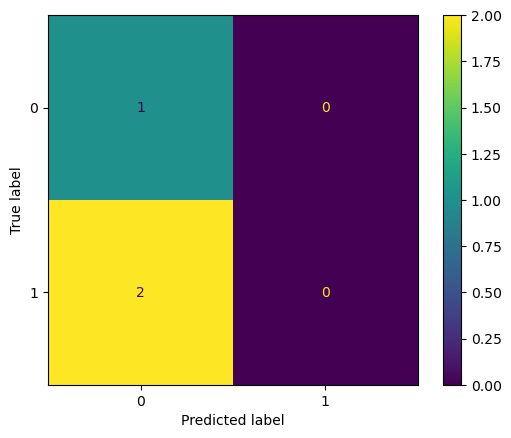

In [65]:
matriz_confusion = confusion_matrix(ejeY_test, prediccion)
visualizar = metrics.ConfusionMatrixDisplay(confusion_matrix = matriz_confusion)
visualizar.plot()

<function matplotlib.pyplot.show(close=None, block=None)>

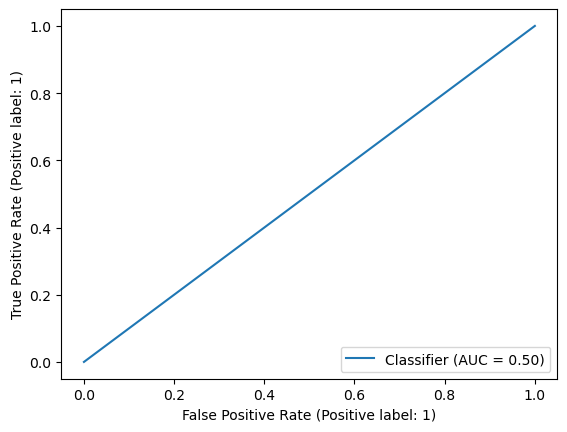

In [66]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(ejeY_test, prediccion)
mplot.show

8. interpretacion, analisis y conclusiones
   


Conclusión del Análisis y Modelado Predictivo
El análisis exploratorio y el modelado predictivo realizados sobre el dataset del Titanic han revelado varios puntos importantes.

Identificación de Valores Atípicos:

Se detectaron valores atípicos en las variables Fare, Pclass, Parch y Age. La presencia de estos valores puede distorsionar el análisis y afectar negativamente la precisión del modelo. Es fundamental abordar estos valores atípicos adecuadamente, ya sea mediante su eliminación o transformación.
Distribución de la Variable Objetivo:

La variable objetivo Survived mostró un desbalance significativo, con más registros de pasajeros que no sobrevivieron en comparación con los que sí lo hicieron. Este desbalance puede llevar a un modelo sesgado que favorezca la clase mayoritaria. Técnicas como el sobremuestreo o submuestreo, y el uso de métricas adecuadas, pueden ayudar a mitigar este problema.
Problemas con el Filtrado de Datos:

La lógica incorrecta utilizada para filtrar los datos resultó en un DataFrame vacío, lo que impidió cualquier análisis posterior. Es crucial revisar y corregir este tipo de errores para mantener la integridad del conjunto de datos.
Rendimiento del Modelo Predictivo:

Se entrenaron y evaluaron modelos de Random Forest y Regresión Logística. Ambos modelos mostraron dificultades para predecir correctamente la clase de los supervivientes, con bajas métricas de recall y precisión. Esto sugiere que los modelos no están capturando bien los patrones subyacentes en los datos.
Visualización de Resultados:

La matriz de confusión y la curva ROC indicaron que el modelo tiene un rendimiento subóptimo, especialmente en la predicción de la clase minoritaria (supervivientes). Estas visualizaciones ayudan a entender mejor dónde el modelo falla y pueden guiar la mejora de su desempeño.
Recomendaciones
Revisión y Corrección del Filtrado de Datos: Es crucial revisar y corregir la lógica de filtrado para evitar la eliminación de datos importantes y asegurar que solo se eliminen los valores atípicos pertinentes.
Manejo del Desbalance de Clases: Implementar técnicas para manejar el desbalance de clases, como el uso de métodos de sobremuestreo, submuestreo o el ajuste de los pesos de las clases durante el entrenamiento del modelo.
Mejora en la Selección de Características: Evaluar y seleccionar características que sean más predictivas, utilizando técnicas de selección de características o ingeniería de características.
Evaluación de Otros Modelos: Probar con diferentes algoritmos de machine learning y realizar validación cruzada para identificar modelos que puedan ofrecer un mejor desempeño.